<a href="https://colab.research.google.com/github/louisestella/deepLearning/blob/main/hands_on_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UFRN** - Departamento de Informática e Matemática Aplicada

Inteligência Artificial - **Aprendizado Profundo**

**Disciplina:** DIM0494 - *Tópicos Especiais em Computação XV*

**Professor:** Ranniery Maia

**Aluna:** Louise Stella Lima Barbosa

# Tarefa  - Hands on KERAS

In [1]:
# load libraries
from sklearn.metrics import accuracy_score,classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from tensorflow import keras
from tensorflow.keras import layers



In [2]:
# Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)



# pré-processamento de dados


In [8]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1, 1)
60000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
#print("y_train shape:", y_train.shape)

# Construção do modelo

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.25),
        #layers.Dense(num_classes, activation="softmax"),
        layers.Dense(num_classes, activation="linear"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

# Treinamento do modelo

In [12]:
# Hyperparameters
batch_size = 128
epochs = 30
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

from sklearn.model_selection import train_test_split

# Separate the test data
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

# model training
history = model.fit(X_train1,
                    y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)



Epoch 1/30
375/375 [==============================] - 13s 5ms/step - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 5/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 6/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 7/30
375/375 [=======

# Avaliação do modelo

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
#print("Test accuracy:", score[1])

Test loss: 0.013218944892287254


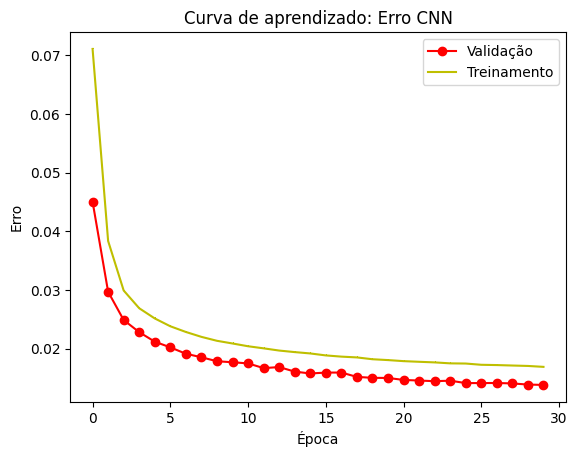

In [19]:
plt.figure()
plt.plot(history.epoch, history.history['val_loss'], 'o-r', label="Validação")
plt.plot(history.epoch, history.history['loss'],',-y', label="Treinamento")
plt.title("Curva de aprendizado: Erro CNN")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()

"""plt.figure()
plt.plot(history.epoch, history.history['val_accuracy'], 'o-r', label="Validação")
plt.plot(history.epoch, history.history['accuracy'],',-y', label="Treinamento")
plt.title("Curva de aprendizado: Erro CNN")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()"""

plt.show()

In [21]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[-0.0164272 , -0.04765528,  0.00188302, ...,  1.1119765 ,
         0.01662442, -0.07419534],
       [ 0.14542627, -0.09796642,  0.97803897, ..., -0.10386201,
        -0.07087314,  0.03170206],
       [ 0.01373723,  0.92001164,  0.01355285, ..., -0.01587828,
         0.04206043, -0.02487189],
       ...,
       [-0.03211333, -0.01550704, -0.04030894, ...,  0.02155405,
         0.14609188, -0.02418876],
       [ 0.03452846, -0.10532729, -0.02070206, ...,  0.05852047,
         0.2610796 ,  0.03431803],
       [-0.01636245, -0.0166574 ,  0.11201756, ..., -0.03978197,
         0.02318604,  0.02687334]], dtype=float32)

In [28]:
predictions[0]

array([-0.0164272 , -0.04765528,  0.00188302, -0.00982866, -0.02648031,
       -0.00916154,  0.04852244,  1.1119765 ,  0.01662442, -0.07419534],
      dtype=float32)